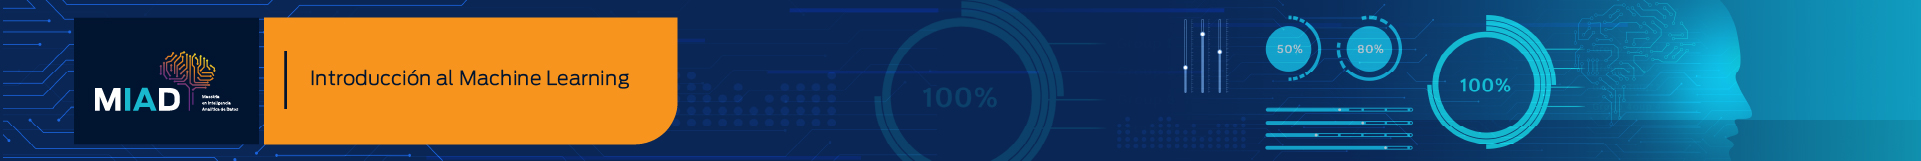

# Introducción al Machine Learning - Semana 2
## Caso: Modelos lineales para regresión, muestreo y selección del mejor modelo

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos lineales de componentes principales, partial least squares y regularización.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:   

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación del modelo usando componentes principales: Se estima el modelo usando componentes principales, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación del modelo usando PCA y el método forward: Se estima el modelo usando el método forward con componentes principales, se responde si es el mismo modelo del punto 2, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [30 puntos] 

Estimación del modelo de partial least squares: Se estima el modelo usando partial least squares, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación de un modelo de penalización: Se estima algún modelo de penalización, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [15 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [5 puntos] 


### Datos

Existe gran variedad de bases de datos reales disponibles en internet usadas por la comunidad académica para la evaluación de modelos predictivos.

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Hitters", la cual contiene 20 variables de jugadores de la Major League Baseball en las temporadas de 1986 y 1987. De esta manera, el objetivo de la actividad es predecir el salario de un jugador basado en las características que describen las variables predictivas.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-hitters

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


In [13]:
#librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.cross_decomposition import PLSRegression


from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet

sns.set_style()

In [14]:
dir = "data\dataset-87300.csv"
data = pd.read_csv(dir) 
print(data.describe().columns)
data = data[data.describe().columns]


Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')


In [15]:
# lectura de datos
dir = "dataset-87300.csv"
dir = "data\dataset-87300.csv"
data = pd.read_csv(dir) 
data.head()
#limpieza eliminar variables categoricas y datos no existentes

# describe toma por defecto solo las columnas numericas, llamando las columnas se pueden eliminar las categoricas
data = data[data.describe().columns]

# busca si existe nulo e la fila, si la suma de la fila es != 0 entonces tiene nulos
idx_conservar = data.isna().sum(axis=1) == 0
data = data[idx_conservar]


XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="Salary"), data["Salary"], test_size=0.3, random_state=0)
del(data)

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [16]:
XTrain.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.00000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,406.146739,108.402174,11.440217,54.918478,50.885870,41.152174,7.211957,2583.690217,697.961957,63.12500,344.391304,311.826087,248.603261,291.864130,129.820652,9.222826
std,146.994796,45.470956,8.662255,25.141542,24.529964,20.808749,4.585993,2106.529393,586.344407,71.22243,295.113628,291.029287,240.086346,287.921794,149.691834,6.849620
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,41.000000,9.000000,0.00000,6.000000,7.000000,4.000000,0.000000,0.000000,0.000000
25%,283.000000,73.750000,5.000000,35.000000,31.000000,26.000000,4.000000,922.500000,227.500000,15.75000,105.750000,93.750000,77.500000,114.750000,8.000000,4.000000
50%,414.500000,107.000000,9.000000,51.500000,47.000000,37.000000,6.000000,1926.000000,504.500000,38.00000,246.500000,239.500000,171.500000,211.500000,56.500000,7.500000
75%,523.750000,141.250000,16.000000,71.250000,68.500000,54.000000,10.000000,3673.750000,978.250000,84.25000,453.500000,401.000000,310.250000,317.500000,220.500000,14.000000
max,687.000000,238.000000,40.000000,130.000000,117.000000,105.000000,20.000000,8759.000000,2583.000000,384.00000,1175.000000,1348.000000,1380.000000,1377.000000,492.000000,32.000000


In [17]:
yTrain.describe()

count     184.000000
mean      520.485375
std       420.267249
min        67.500000
25%       190.000000
50%       420.833500
75%       750.000000
max      2127.333000
Name: Salary, dtype: float64

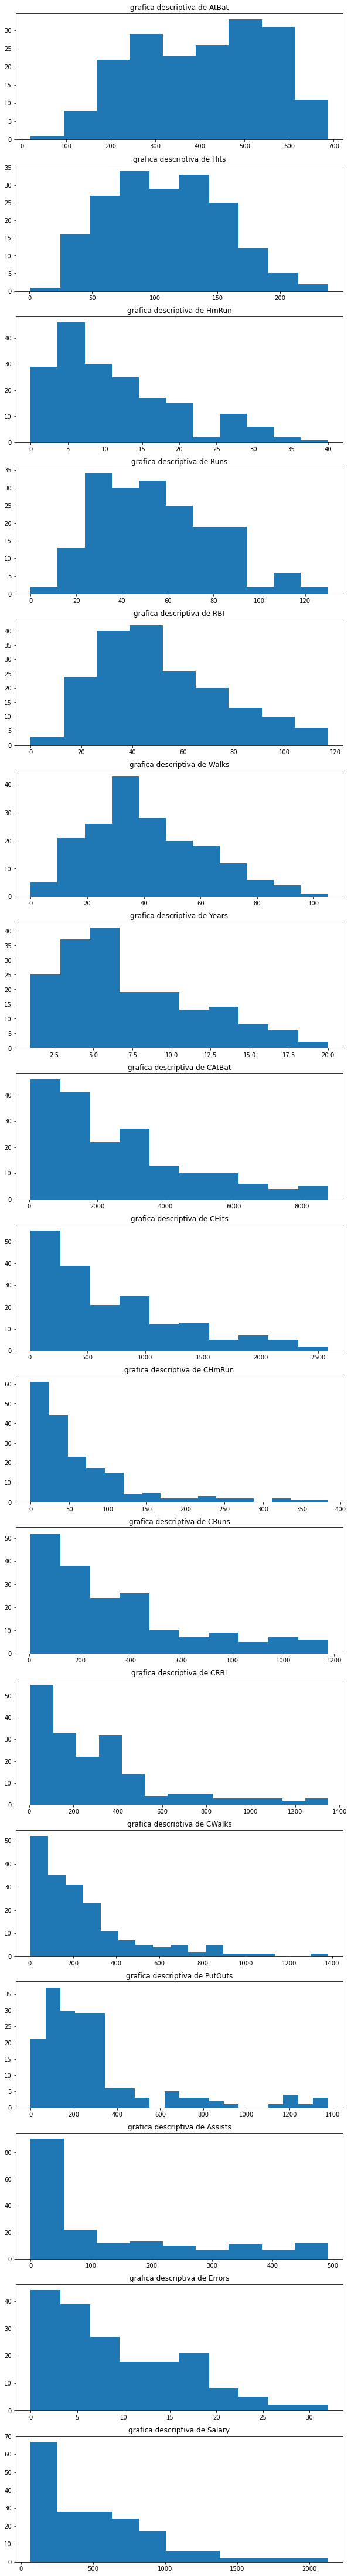

In [18]:
desc_df = pd.concat([XTrain,yTrain],axis=1)

fig ,axes = plt.subplots(nrows=len(desc_df.columns),ncols=1, figsize=(10, 80))

axs = axes.flatten()

for i, c in enumerate(desc_df):
    
    axs[i].hist(desc_df[c], bins='auto')
    axs[i].set_title("grafica descriptiva de {}".format(c))

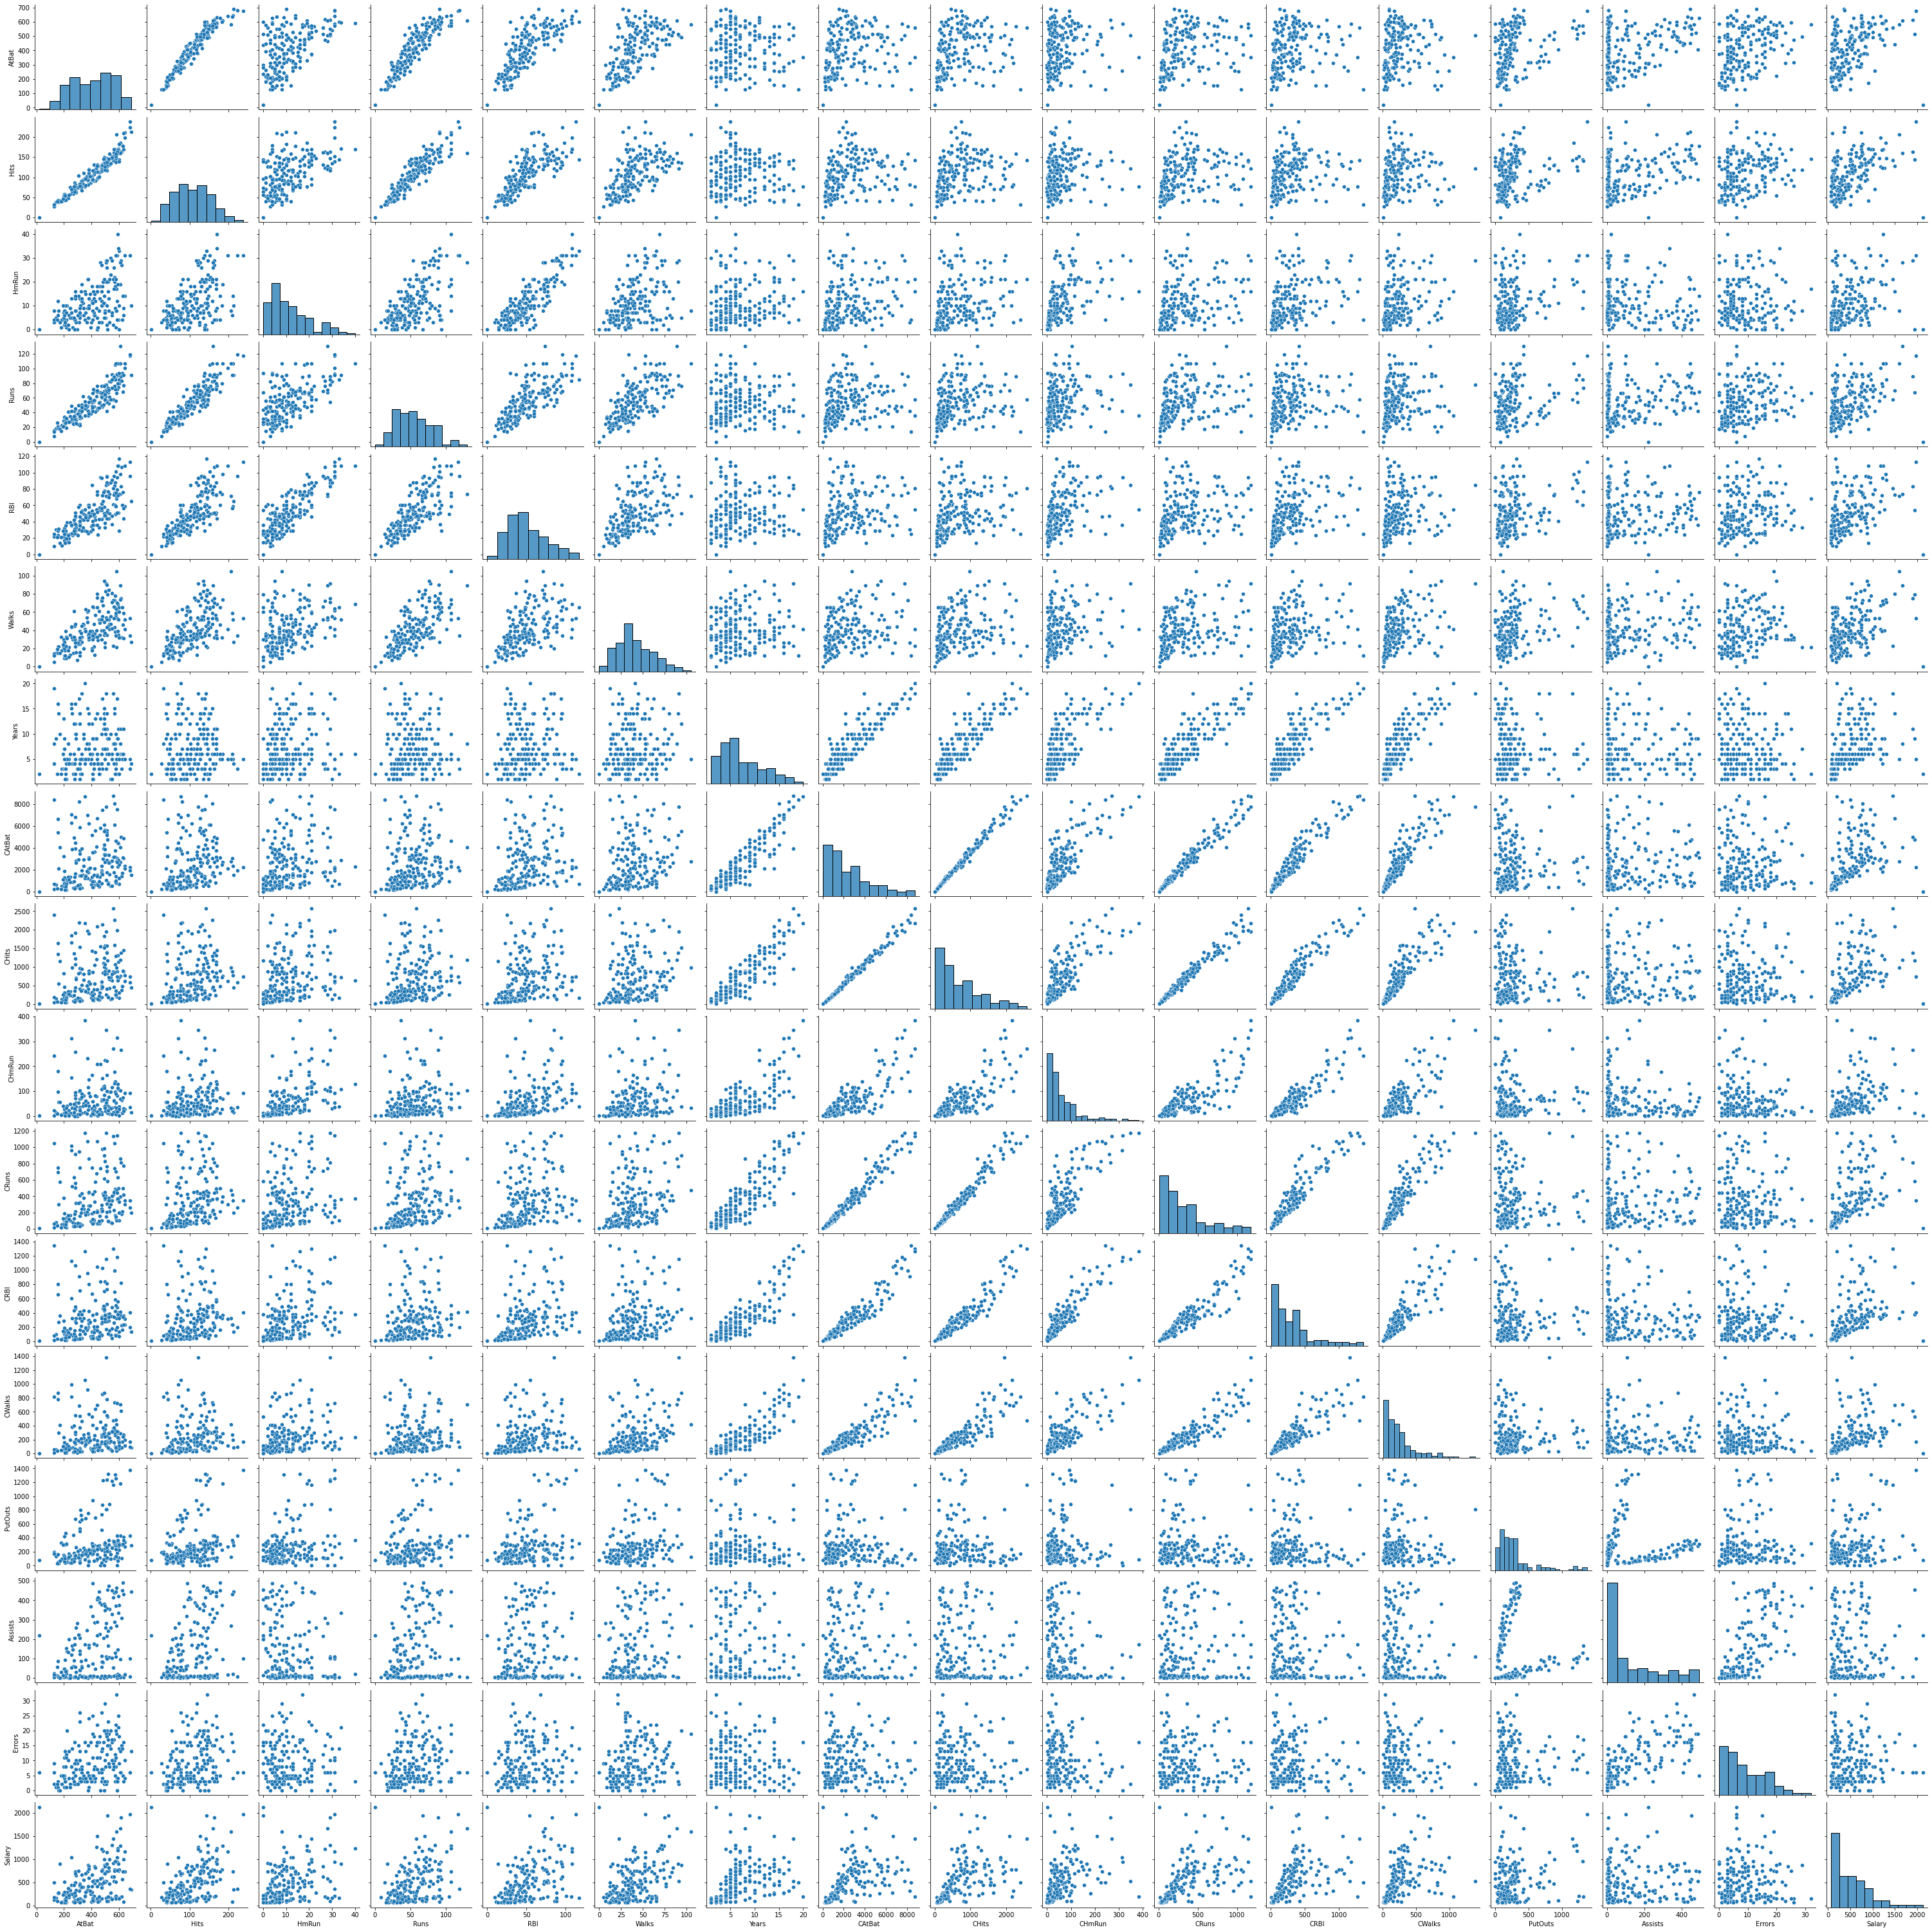

In [19]:
sns.pairplot(desc_df, kind="scatter")

<AxesSubplot:>

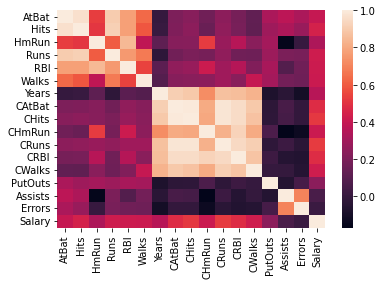

In [20]:
sns.heatmap(desc_df.corr())
#del(desc_df)

In [21]:
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(XTrain)
XTrain_escalado = scaler.transform(XTrain)
XTest_escalado = scaler.transform(XTest)

In [22]:
pd.DataFrame(XTrain_escalado).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02,1.840000e+02
mean,-1.810146e-16,-1.182629e-16,6.033821e-17,8.930055e-17,1.689470e-17,6.275174e-17,-9.895466e-17,-6.154497e-17,3.982322e-17,9.050731e-18,8.447349e-17,-2.775558e-17,-2.292852e-17,-3.921984e-17,1.134358e-16,2.715219e-18
std,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00,1.002729e+00
min,-2.634109e+00,-2.368440e+00,-1.324301e+00,-2.190332e+00,-2.080097e+00,-1.983034e+00,-1.358246e+00,-1.210345e+00,-1.178218e+00,-8.887262e-01,-1.149776e+00,-1.050265e+00,-1.021594e+00,-1.016458e+00,-8.696190e-01,-1.350147e+00
25%,-8.400484e-01,-7.641520e-01,-7.455091e-01,-7.944153e-01,-8.128886e-01,-7.301504e-01,-7.022951e-01,-7.907427e-01,-8.045538e-01,-6.669846e-01,-8.108485e-01,-7.513715e-01,-7.146184e-01,-6.168251e-01,-8.160301e-01,-7.645792e-01
50%,5.698197e-02,-3.092083e-02,-2.824756e-01,-1.363403e-01,-1.588454e-01,-2.000843e-01,-2.649946e-01,-3.130670e-01,-3.308462e-01,-3.537306e-01,-3.326122e-01,-2.491963e-01,-3.220243e-01,-2.798795e-01,-4.911471e-01,-2.522077e-01
75%,8.022335e-01,7.243624e-01,5.278330e-01,6.513555e-01,7.200251e-01,6.191089e-01,6.096064e-01,5.188791e-01,4.793306e-01,2.974153e-01,3.707264e-01,3.072448e-01,2.574696e-01,8.928055e-02,6.074264e-01,6.993393e-01
max,1.915847e+00,2.857900e+00,3.306034e+00,2.994501e+00,2.702594e+00,3.076688e+00,2.796109e+00,2.939508e+00,3.223671e+00,4.517545e+00,2.822218e+00,3.570091e+00,4.725316e+00,3.779140e+00,2.426101e+00,3.334393e+00


C:\Users\paulg\AppData\Local\Temp\ipykernel_31676\2189079870.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


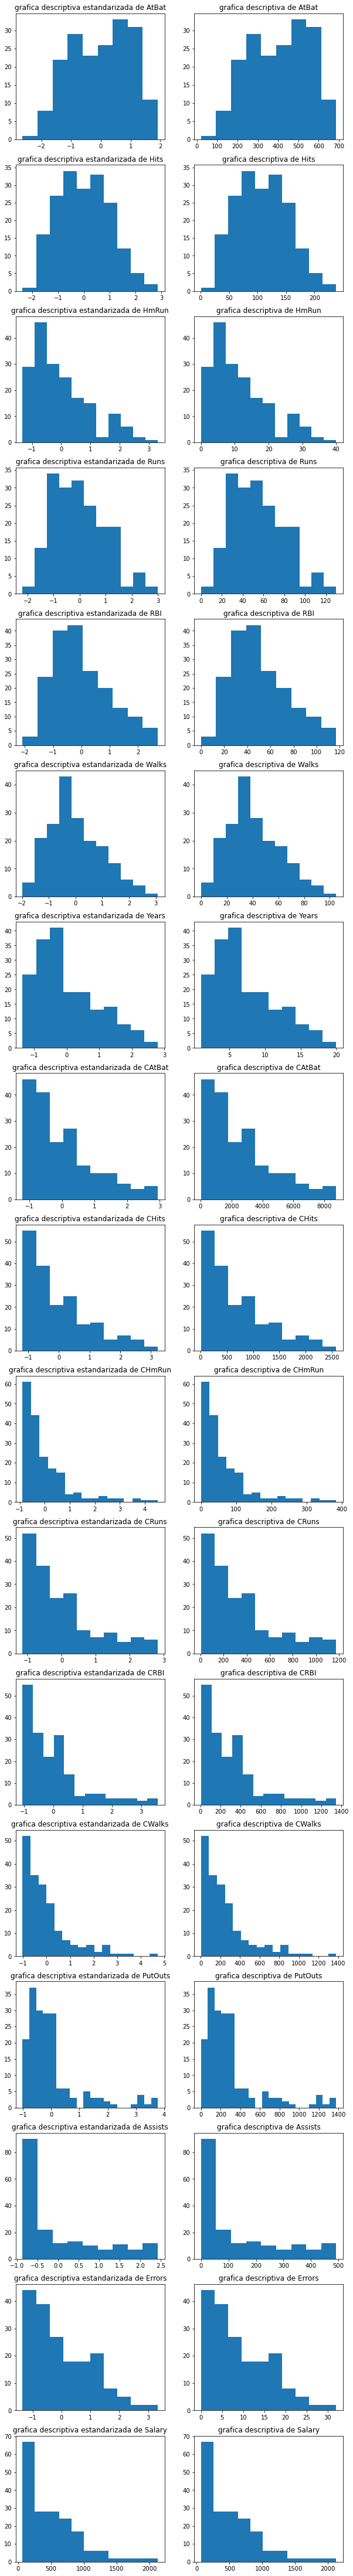

In [23]:
desc_df = pd.concat([XTrain,yTrain],axis=1)
desc_df2 = pd.concat([pd.DataFrame(XTrain_escalado, columns = XTrain.columns, index = XTrain.index),yTrain],axis=1)

fig.clear()

fig1 ,axes1 = plt.subplots(nrows=len(desc_df2.columns),ncols=2, figsize=(10, 80))

axs1 = axes1.flatten()

for i, c in enumerate(desc_df/2):
    
    axs1[2*i].hist(desc_df2[c], bins='auto')
    axs1[2*i].set_title("grafica descriptiva estandarizada de {}".format(c))

    axs1[2*i+1].hist(desc_df[c], bins='auto')
    axs1[2*i+1].set_title("grafica descriptiva de {}".format(c))

fig1.show()

## Analisis

#### Correlaciones
Hay alta correlacion entre ciertas variables que se evidencian en el scatter plot y en el heat map, al analizar cuales son las variables correlacionadas se encuentra que el alto valor tiene sentido lógico. Por ejemplo: 

AtBat - Hits : es de esperar que entre mas veces se se pare un jugador en el plato a batear, mas hits tendrá, pues tiene más oportunidades.

Years - C(variables) : la variable Years tiene alta correlacion con las variables que empiezan con la letra **C** ya que estas variables representan el valor de hits, runs, etc., a lo largo de la carrera completa del jugador, de modo que entre mas longeva es la carrera, es de esperar que estos valores también aumenten.

Por otro lado, hay variables que están altamente relacionadas entre sí ya que son consecuenciales. Por ejemplo, CHmRun (numero de Homeruns hechos en la carrera); si se hacen home runs es por que se hizo un hit, si se hizo un hit es por que habia un turno en el bat, y así con otras correlaciones.

#### Distribuciones
Algunas de las distirbuciones tienen un comportamiento similar a la distribucion normal. Sin embargo, hay varias que tienen un "skew" que evidencia que es menos comun tener valores muy altos para esta variable. Por ejemplo, la mayoria de jugadores presentan valores bajos para las variables Salary, CHmRun, Put Outs, Assists, entre otras. Se concluye que pocos jugadores tienen desempeños muy altos al bate o como campistas o pitchers (super estrellas). 

Cabe resaltar que algunas variables no son informativas del desempeño, como el número de walks de un jugador, ya que esto ocurre cuendo hay un mal juego del pitcher. Se podría decir preliminarmente que estas variables no tendrán mucho poder predictivo.

**AtBat :** Number of times at bat in 1986

**Hits :** Number of hits in 1986

**HmRun :** Number of home runs in 1986

**Runs :** Number of runs in 1986

**RBI :** Number of runs batted in in 1986

**Walks :** Number of walks in 1986

**Years :** Number of years in the major leagues

**CAtBat :** Number of times at bat during his career

**CHits :** Number of hits during his career

**CHmRun :** Number of home runs during his career

**CRuns :** Number of runs during his career

**CRBI :** Number of runs batted in during his career

**CWalks :** Number of walks during his career

**PutOuts :** Number of put outs in 1986

**Assists :** Number of assists in 1986

**Errors :** Number of errors in 1986

**Salary :** 1987 annual salary on opening day in thousands of dollars

### 2. Estimación del modelo usando componentes principales (20 puntos)
Estimen un modelo predictivo usando la muestra de entrenamiento usando componentes principales y evalúen su desempeño en la muestra de test.

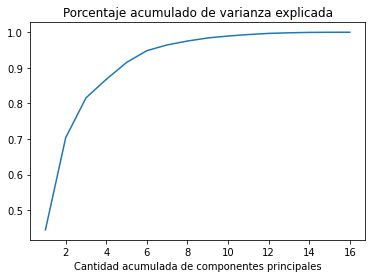

In [24]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

p=len(XTrain_escalado[1,])
pca = PCA(n_components=p).fit(XTrain_escalado)
A=pca.components_

varianzaExplicada=pca.explained_variance_
porcentajeVarianzaExplicada=pca.explained_variance_ratio_

plt.plot(range(1,p+1),np.cumsum(porcentajeVarianzaExplicada))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

In [25]:
ZTrain=np.matmul(XTrain_escalado,A)
#aplica la regresion
regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

ZTest=np.matmul(XTest_escalado,A)

yTest_PCA=regPCA.predict(ZTest)
MSEPCAfull=np.average(np.square(yTest_PCA-yTest))
print('MSE regresión PCA con todas las componentes principales:')
print(MSEPCAfull)

MSE regresión PCA con todas las componentes principales:
128399.28503551555


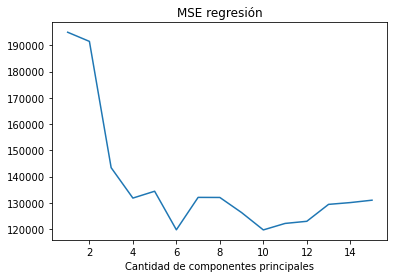

In [26]:
mse_components = []

for i in np.arange(1,p):

    ZTrain_total=np.matmul(XTrain_escalado,A)
    ZTrain_i = ZTrain_total[:,range(i)]

    regPCA = LinearRegression()
    regPCA.fit(ZTrain_i, yTrain)

    ZTotalTest=np.matmul(XTest_escalado,A)
    ZTest_i = ZTotalTest[:,range(i)]

    yTest_PCA=regPCA.predict(ZTest_i)
    MSEPCA=np.average(np.square(yTest_PCA-yTest))
    mse_components.append(MSEPCA)


plt.plot(np.arange(1,p),mse_components)
plt.xlabel('Cantidad de componentes principales')
plt.title('MSE regresión')
plt.show()

In [27]:
nComponentesElegidas = np.argmin(mse_components) + 1

ZTotalTrain=np.matmul(XTrain_escalado,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]

regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

ZTotalTest=np.matmul(XTest_escalado,A)
ZTest = ZTotalTest[:,range(nComponentesElegidas)]

yTest_PCA=regPCA.predict(ZTest)
MSEPCAargmin=np.average(np.square(yTest_PCA-yTest))
# mse_components.append(MSEPCAargmin)

print('MSE regresión PCA por {} componentes principales:'.format(nComponentesElegidas))
print(MSEPCAargmin)

MSE regresión PCA por 10 componentes principales:
119665.39320271353


In [28]:
nComponentesElegidas = 6

ZTotalTrain=np.matmul(XTrain_escalado,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]

regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

ZTotalTest=np.matmul(XTest_escalado,A)
ZTest = ZTotalTest[:,range(nComponentesElegidas)]

yTest_PCA=regPCA.predict(ZTest)
MSEPCA6com=np.average(np.square(yTest_PCA-yTest))
# mse_components.append(MSEPCA6com)

print('MSE regresión PCA por {} componentes principales:'.format(nComponentesElegidas))
print(MSEPCA6com)

MSE regresión PCA por 6 componentes principales:
119709.19612400385


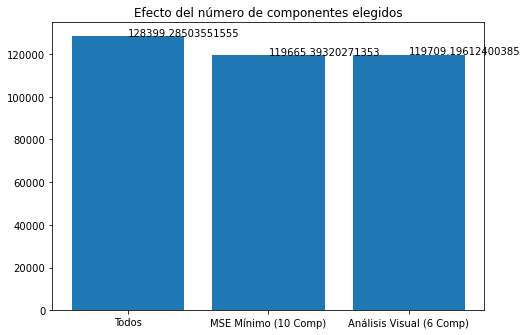

In [29]:
MSE_modelsPCA = [MSEPCAfull,MSEPCAargmin,MSEPCA6com]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Efecto del número de componentes elegidos")
ejeX = ['Todos', 'MSE Mínimo (10 Comp)','Análisis Visual (6 Comp)']
ejeY = MSE_modelsPCA
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

## Analisis

Primero, se realizo el escalamiento de las variables para dejarlas centradas y escaladas, y evitar problemas numéricos causados por las magnitudes de las unidades. Luego se procedió a la aplicación de PCA y la selección de componentes para el modelo.

Se puede ver que, según la gráfica de Porcentaje Acumulado de Varianza explicada, se explica más del 90% de la varianza cuando se usan al rededor de 6 componentes principales. Sin embargo, según el MSE mínimo, el número de componentes óptimos es 10. Con esto se obtuvo un MSE de 119,665.3932. Sin embargo, visualmente se pudo ver que el MSE se acerca mucho al usar solo 6 componentes principales, de modo que se calculó y se obtuvo un valor de 119,709.1961. La gráfica de la celda anterior ilustra esto y demuestra que el desempeño de los modelos es muy cercano si se usan 10 o 6 componentes.  



### 3. Estimación del modelo usando PCA y el método forward (30 puntos)
Ahora construyan su propio algoritmo para hacer una regresión por componentes principales, en donde primero calculen los componentes y después realicen un proceso de selección de variables secuencial (forward) que permita encontrar el mejor modelo. Todo lo anterior en la muestra de entrenamiento.

Finalmente, evalúen el desempeño en test.

Una vez hecho este procedimiento respondan a la siguiente pregunta:

¿Es el mismo modelo del punto anterior (punto 2)? 

In [30]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

## PCA al incio
# con pca total
p=len(XTrain_escalado[1,])
pca = PCA(n_components = p).fit(XTrain_escalado)
A=pca.components_
ZTotalTrain=np.matmul(XTrain_escalado,A)


# con el elegido 
nComponentesElegidas = np.argmin(mse_components) + 1
ZTotalTrain=np.matmul(XTrain_escalado,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]

# Cambiar este bool para elegir modelo PCA total o componente elegidos por MSE mínimo.
total = True

if total:
    ZTrain = ZTotalTrain
    print("Se realizará la estimación con el PCA total.")
    r2adj = []
else:
    print("Se realizará la estimación con los componentes elegidos por el MSE mínimo.")
    r2adjelegido = []
        
len_x = len(ZTrain[1,])
len_y = len(yTrain)



for a in range(1,len_x+1):
    if(a<(len_x)):

        sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select = a, direction='forward')
        sfs.fit(ZTrain, yTrain)
        XTrain_seleccionado=sfs.fit_transform(ZTrain, yTrain)
        
        regAuxiliar = LinearRegression()
        regAuxiliar.fit(XTrain_seleccionado, yTrain)
        
        r2Modelo=regAuxiliar.score(XTrain_seleccionado, yTrain)
        r2adjModelo=1-(1-r2Modelo)*(len_y-1)/(len_y-a-1)
        if total:
            r2adj.append(r2adjModelo)
        else:
            r2adjelegido.append(r2adjModelo)    
    else:
        regAuxiliar = LinearRegression()
        regAuxiliar.fit(ZTrain, yTrain)
        r2Modelo=regAuxiliar.score(ZTrain, yTrain)
        r2adjModelo=1-(1-r2Modelo)*(len_y-1)/(len_y-a-1)
        if total:
            r2adj.append(r2adjModelo)
        else:
            r2adjelegido.append(r2adjModelo)
    if(a>1):
        mensaje = ['Evaluación del modelo con', str(a),'variables']
    else:
        mensaje = ['Evaluación del modelo con', str(a),'variable']
    
    print(" ".join(mensaje))

Se realizará la estimación con el PCA total.
Evaluación del modelo con 1 variable
Evaluación del modelo con 2 variables
Evaluación del modelo con 3 variables
Evaluación del modelo con 4 variables
Evaluación del modelo con 5 variables
Evaluación del modelo con 6 variables
Evaluación del modelo con 7 variables
Evaluación del modelo con 8 variables
Evaluación del modelo con 9 variables
Evaluación del modelo con 10 variables
Evaluación del modelo con 11 variables
Evaluación del modelo con 12 variables
Evaluación del modelo con 13 variables
Evaluación del modelo con 14 variables
Evaluación del modelo con 15 variables
Evaluación del modelo con 16 variables


In [31]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

## PCA al incio
# con pca total
p=len(XTrain_escalado[1,])
pca = PCA(n_components = p).fit(XTrain_escalado)
A=pca.components_
ZTotalTrain=np.matmul(XTrain_escalado,A)


# con el elegido 
nComponentesElegidas = np.argmin(mse_components) + 1
ZTotalTrain=np.matmul(XTrain_escalado,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]

# Cambiar este bool para elegir modelo PCA total o componente elegidos por MSE mínimo.
total = False

if total:
    ZTrain = ZTotalTrain
    print("Se realizará la estimación con el PCA total.")
    r2adj = []
else:
    print("Se realizará la estimación con los componentes elegidos por el MSE mínimo.")
    r2adjelegido = []
        
len_x = len(ZTrain[1,])
len_y = len(yTrain)

for a in range(1,len_x+1):
    if(a<(len_x)):

        sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select = a, direction='forward')
        sfs.fit(ZTrain, yTrain)
        XTrain_seleccionado=sfs.fit_transform(ZTrain, yTrain)
        
        regAuxiliar = LinearRegression()
        regAuxiliar.fit(XTrain_seleccionado, yTrain)
        
        r2Modelo=regAuxiliar.score(XTrain_seleccionado, yTrain)
        r2adjModelo=1-(1-r2Modelo)*(len_y-1)/(len_y-a-1)
        if total:
            r2adj.append(r2adjModelo)
        else:
            r2adjelegido.append(r2adjModelo)        
    else:
        regAuxiliar = LinearRegression()
        regAuxiliar.fit(ZTrain, yTrain)
        r2Modelo=regAuxiliar.score(ZTrain, yTrain)
        r2adjModelo=1-(1-r2Modelo)*(len_y-1)/(len_y-a-1)
        if total:
            r2adj.append(r2adjModelo)
        else:
            r2adjelegido.append(r2adjModelo)
    if(a>1):
        mensaje = ['Evaluación del modelo con', str(a),'variables']
    else:
        mensaje = ['Evaluación del modelo con', str(a),'variable']
    
    print(" ".join(mensaje))

Se realizará la estimación con los componentes elegidos por el MSE mínimo.
Evaluación del modelo con 1 variable
Evaluación del modelo con 2 variables
Evaluación del modelo con 3 variables
Evaluación del modelo con 4 variables
Evaluación del modelo con 5 variables
Evaluación del modelo con 6 variables
Evaluación del modelo con 7 variables
Evaluación del modelo con 8 variables
Evaluación del modelo con 9 variables
Evaluación del modelo con 10 variables


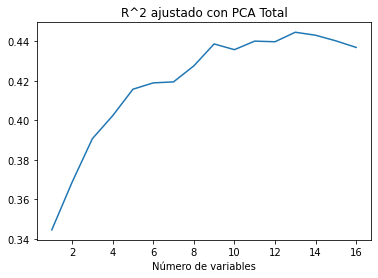

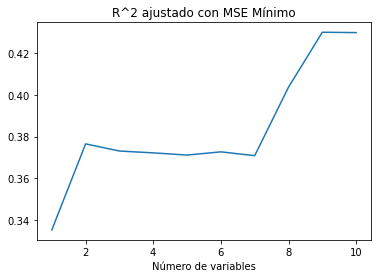

In [32]:
plt.plot(range(1,len(r2adj)+1),r2adj)
plt.xlabel('Número de variables')
plt.title('R^2 ajustado con PCA Total')
plt.show()

plt.plot(range(1,len(r2adjelegido)+1),r2adjelegido)
plt.xlabel('Número de variables')
plt.title('R^2 ajustado con MSE Mínimo')
plt.show()

In [33]:
nVariablesSeleccionadasT=np.argmax(r2adj)+1

if(nVariablesSeleccionadasT<p):
    sfsElegido = SequentialFeatureSelector(LinearRegression(), n_features_to_select=nVariablesSeleccionadasT)
    sfsElegido.fit(ZTotalTrain, yTrain)
    XTrainSeleccionado=sfsElegido.fit_transform(ZTotalTrain, yTrain)
    modeloFwdT = LinearRegression()
    modeloFwdT.fit(XTrainSeleccionado, yTrain)
    variablesSeleccionadasT=np.array(range(1,p+1))[sfsElegido.get_support()]
else:
    modeloFwdT = LinearRegression()
    modeloFwdT.fit(ZTotalTrain, yTrain)
    variablesSeleccionadasT=np.array(range(1,p+1))
    
mensaje = ['El número de variables seleccionadas con PCA Total es', str(nVariablesSeleccionadasT),'y corresponden a las columnas:',str(variablesSeleccionadasT)]
print(" ".join(mensaje))

nVariablesSeleccionadasM=np.argmax(r2adjelegido)+1

if(nVariablesSeleccionadasM<p):
    sfsElegido = SequentialFeatureSelector(LinearRegression(), n_features_to_select=nVariablesSeleccionadasM)
    sfsElegido.fit(ZTotalTrain, yTrain)
    XTrainSeleccionado=sfsElegido.fit_transform(ZTotalTrain, yTrain)
    modeloFwdM = LinearRegression()
    modeloFwdM.fit(XTrainSeleccionado, yTrain)
    variablesSeleccionadasM=np.array(range(1,p+1))[sfsElegido.get_support()]
else:
    modeloFwdM = LinearRegression()
    modeloFwdM.fit(ZTotalTrain, yTrain)
    variablesSeleccionadasM=np.array(range(1,p+1))
    
mensaje = ['El número de variables seleccionadas con MSE Mínimo es', str(nVariablesSeleccionadasM),'y corresponden a las columnas:',str(variablesSeleccionadasM)]
print(" ".join(mensaje))

El número de variables seleccionadas con PCA Total es 13 y corresponden a las columnas: [ 1  2  3  4  5  6  7  9 10 12 13 15 16]
El número de variables seleccionadas con MSE Mínimo es 9 y corresponden a las columnas: [ 1  2  3  5  6  9 10 13 15]


In [34]:
ZTotalTest = np.matmul(XTest_escalado,A)

prediccionFwdT=modeloFwdT.predict(ZTotalTest[:,variablesSeleccionadasT-1])
MSEFwd=np.average(np.square(prediccionFwdT-yTest))
mensaje = ['El MSE de la regresión lineal usando las variables seleccionadas por el método forward con PCA Total es:',str(MSEFwd)]
print(" ".join(mensaje))

prediccionFwdM=modeloFwdM.predict(ZTotalTest[:,variablesSeleccionadasM-1])
MSEFwd=np.average(np.square(prediccionFwdM-yTest))
mensaje = ['El MSE de la regresión lineal usando las variables seleccionadas por el método forward con MSE Mínimo es:',str(MSEFwd)]
print(" ".join(mensaje))

El MSE de la regresión lineal usando las variables seleccionadas por el método forward con PCA Total es: 130697.99039503354
El MSE de la regresión lineal usando las variables seleccionadas por el método forward con MSE Mínimo es: 128183.38267581504


## Analisis

### Orden de escogencia de variables en Forward vs. PCAr?

En este punto se realizó el procedimiento para elegir los componentes a utilizar para el modelo y se probaron dos acercamientos: 

1. Se usaron todos los componentes principales ($ZTrain = ZTotalTrain$). Este método arrojó un MSE de 130,697.9904.

2. Se usaron los componentes principales correspondientes al MSE Mínimo por PCA ($ZTrain = Componentes Elegidas$). Este método arrojó un MSE de 128,183.3827.

De este modo se determinó que el mejor modelo fue el estimado usando el MSE Mínimo arrojado por el PCA. 

Dicho esto, se puede ver que el modelo estimado no es el mismo que cuando se realizó únicamente la PCA en el punto 1, ya que usa menos variables (9 vs. 6 o 10). Esto se puede presentarse ya que el modelo de selección de variables tipo Forward realiza la computación de la estimación del modelo hasta que la combinación lineal de las variables se optimiza ($R^{2}_{adj}$ máximo). En el caso de este taller, esto ocurre al llegar a $k = 9$. Se debe notar que la regresión por componentes principales nos dio una selección de 10 PC, de modo que se puede ver cómo el uso de los dos métodos difiere. También se puede ver que el MSE hallado en el punto 1 denota un mejor desempeño que el que se halló con el método Forward.

Las variables tambien cambian ya que el metodo forward implementado es del tipo *greedy* esto quiere decir que la primera variable que selecciona es la que mas aporta, luego manteniendo esta variable procede a seleccionar el resto.

### 4. Estimación del modelo de partial least squares (20 puntos)
Predigan usando partial least squares y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [35]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####

pls = PLSRegression(n_components=p)
pls.fit(XTrain_escalado, yTrain)

yTest_PLS = pls.predict(XTest_escalado)

yTest_PLS=np.hstack(yTest_PLS)
MSEPLS=np.average(np.square(yTest_PLS - yTest))
print('MSE regresión por partial least squares:')
print(MSEPLS)

MSE regresión por partial least squares:
128399.28503551517


MSE regresión por partial least squares:
131936.79592228323
MSE regresión por partial least squares:
131437.5752494408
MSE regresión por partial least squares:
128835.37682425474
MSE regresión por partial least squares:
134204.02487288055
MSE regresión por partial least squares:
139095.7519776544
MSE regresión por partial least squares:
134853.08896690633
MSE regresión por partial least squares:
134501.87508634708
MSE regresión por partial least squares:
125214.28847060303
MSE regresión por partial least squares:
122274.50950092259
MSE regresión por partial least squares:
120878.65999848294
MSE regresión por partial least squares:
126885.65526496063
MSE regresión por partial least squares:
125247.36470027344
MSE regresión por partial least squares:
124766.4598879505
MSE regresión por partial least squares:
124714.20587766856
MSE regresión por partial least squares:
125321.4434056428


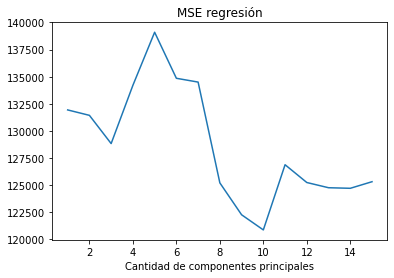

In [36]:

MSE_PLS_array = []
for i in range(1,p):
    pls = PLSRegression(n_components=i)
    pls.fit(XTrain_escalado, yTrain)

    prediccionPLS=pls.predict(XTest_escalado)

    prediccionPLS=np.hstack(prediccionPLS)
    MSEPLS = np.average(np.square(prediccionPLS-yTest))
    print('MSE regresión por partial least squares:')
    print(MSEPLS)

    MSE_PLS_array.append(MSEPLS)

plt.plot(np.arange(1,p),MSE_PLS_array)
plt.xlabel('Cantidad de componentes principales')
plt.title('MSE regresión')
plt.show()

In [37]:
pmin = np.argmin(MSE_PLS_array)+1


scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(XTrain_escalado)
XEscaladoTrain = scaler.transform(XTrain_escalado)

pls = PLSRegression(n_components = pmin)
pls.fit(XTrain_escalado, yTrain)

XEscaladoTest = scaler.transform(XTest_escalado)
yTest_PLS = pls.predict(XTest_escalado)

yTest_PLS=np.hstack(yTest_PLS)
MSEPLS=np.average(np.square(yTest_PLS - yTest))
print('MSE regresión por partial least squares:')
print(MSEPLS)

MSE regresión por partial least squares:
120878.65999848294


### Analisis

En este punto se realizó el método  de Regresión por Mínimos Cuadrados Parciales. Con este método se halló que el número óptimo de conponentes para usar en la estimación del modelo fueron 10. Esto es igual que con el método de PCAR, mas se puede apreciar que las gráficas de MSE son muy diferentes. Esto se puede explicar porque el método PLSR busca concentrar la información que se tiene para predecir la variable de respuesta, en lugar de encontrar los PC usando las variables de entrada. Sin embargo, se nota que el MSE calculado en este método (120,878.659998) aún es mayor que el obtenido usando úncamente PCAR (119,709.196124), de modo que se peude decir que los primeros componentes principales contienen la mayoría de la información de las variables de entrada.

Al comparar con  cantidad de variables escogidas **10** es el mismo en PCA y en PLS, esto puede ser debido a que ambos metodos de una manera u otra utilizan la correlacion de las variables con el valor y

### 5. Estimación de un modelo de penalización (15 puntos)
Predigan usando un modelo de penalización y evalúen en la muestra de test. Concluyan sobre el poder predictivo del modelo estimado.

In [46]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
# l1 es Lasso
l1_ratio = 1
coefs = []

ZTotalTrain=np.matmul(XTrain_escalado,A)
modeloElastic = ElasticNetCV(alphas = alphasCalibrar, cv=5, random_state=0, l1_ratio=l1_ratio, max_iter=5000).fit(XTrain_escalado,yTrain)
    
print('El parámetro de penalización es:')
print(modeloElastic.alpha_)
print('El valor del R^2 es:')
print(modeloElastic.score(XTrain_escalado, yTrain))
print('Los coeficientes estimados son:')
print(modeloElastic.coef_)
print("valores de alpha probados")
print(modeloElastic.alphas)


El parámetro de penalización es:
0.6747544053110686
El valor del R^2 es:
0.4846066991824729
Los coeficientes estimados son:
[-273.55119104  277.38177121   35.23053975  -41.30717955   17.85183473
  123.88475207  -21.38306082 -372.81113139  394.2312507   -10.969513
  315.07166545   -0.         -147.71358339   73.61508988   39.91061743
  -27.78680412]
valores de alpha probados
[1.00000000e-10 1.14895100e-10 1.32008840e-10 1.51671689e-10
 1.74263339e-10 2.00220037e-10 2.30043012e-10 2.64308149e-10
 3.03677112e-10 3.48910121e-10 4.00880633e-10 4.60592204e-10
 5.29197874e-10 6.08022426e-10 6.98587975e-10 8.02643352e-10
 9.22197882e-10 1.05956018e-09 1.21738273e-09 1.39871310e-09
 1.60705282e-09 1.84642494e-09 2.12145178e-09 2.43744415e-09
 2.80050389e-09 3.21764175e-09 3.69691271e-09 4.24757155e-09
 4.88025158e-09 5.60716994e-09 6.44236351e-09 7.40196000e-09
 8.50448934e-09 9.77124154e-09 1.12266777e-08 1.28989026e-08
 1.48202071e-08 1.70276917e-08 1.95639834e-08 2.24780583e-08
 2.58261876e-

In [51]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 5 ####

step = 0.1
arr_l1_ratio = np.arange(0,1+step,step)

r2 = []

for l1 in arr_l1_ratio:
    
    n_alphas = 200
    alphasCalibrar = np.logspace(-4, 4, n_alphas)
    # l1 es Lasso
    
    modeloElastic = ElasticNetCV(alphas = alphasCalibrar, cv=5, random_state=0, l1_ratio=l1, max_iter=5000).fit(XTrain_escalado,yTrain)
    r2MEN = modeloElastic.score(XTrain_escalado, yTrain)
    r2.append(r2MEN)

c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12526518.728760872, tolerance: 2505.9733332099895
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\paulg\anaconda3\envs\nlp_proyect\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want t

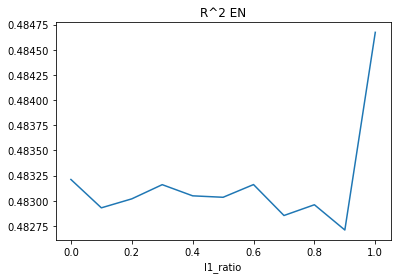

In [49]:
plt.plot(arr_l1_ratio,r2)
plt.xlabel('l1_ratio')
plt.title('R^2 EN')
plt.show()

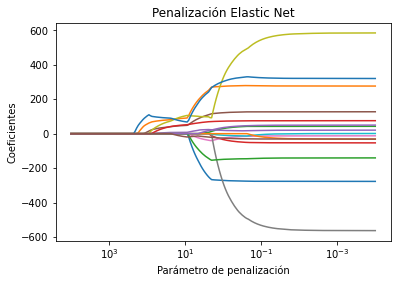

El parametro de L1 es:
1
El parámetro de penalización es:
0.6593188271333549
El valor del R^2 es:
0.4846738116692584
Los coeficientes estimados son:
[-273.6604618   277.49786261   35.48389354  -41.65526274   17.79864542
  123.98780454  -21.17846587 -376.84978793  397.53468443  -11.06307792
  315.64686507   -0.         -147.66397495   73.65237418   40.12733983
  -27.86469188]


In [50]:
coefs = []
for a in alphasCalibrar:
    elasticNet = ElasticNet(alpha=a, fit_intercept=False,max_iter=10000, l1_ratio = l1_ratio)
    elasticNet.fit(XTrain_escalado, yTrain)
    coefs.append(elasticNet.coef_)

# Presentación de resultados

ax = plt.gca()

ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización Elastic Net')
plt.axis('tight')
plt.show()


print('El parametro de L1 es:')
print(l1_ratio)
print('El parámetro de penalización es:')
print(modeloElastic.alpha_)
print('El valor del R^2 es:')
print(modeloElastic.score(XTrain_escalado, yTrain))
print('Los coeficientes estimados son:')
print(modeloElastic.coef_)
# print("valores de alpha probados: ")
# print(modeloElastic.alphas)

In [42]:
prediccionElastic=modeloElastic.predict(XTest_escalado)
MSEElastic=np.average(np.square(prediccionElastic-yTest))
print('MSE regresión con penalización tipo Elastic Net:')
print(MSEElastic)

MSE regresión con penalización tipo Elastic Net:
124670.29938466854


## Analisis

Para este punto se realizó primero la selección del parámetro l1_ratio, que nos permite graduar el porcentaje que el modelo Elastic Net aplica de las penalizaciones tipo Ridge o tipo LASSO. Al correr el ciclo se halló que el mejor $R^2$ se obtiene al dejar el parámetro en 1, que, por las propiedades de la función ElasticNetCV, es equivalente a correr el modelo con penalización tipo LASSO ($\alpha=1$).

Seguidamente, se realizó la calibración de los valores de $\alpha$, donde se halló que el valor del parámetro de pensalización fue de 0.6593188271333549, el $R^2=0.4846738116692584$ y se eliminó una variable.

Por último, se halló que el MSE del modelo estimado con este métodod e penalización fue de 124,670.29938. Esto sigue siendo mayor que los hallados usando los métodos anteriores. Esto puede deberse a que se conservaron variables que pueden no tener mucho poder de predicción, aumentando la varianza del modelo.


### 6. Elección del mejor modelo (5 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

Se puede ver que el mejor método de estimación de modelos para este set de datos fue la Regresión por Análisis de Componentes Principales. Se resalta que en este método se hallaron dos números "óptimos" de componentes principales: 10 por el MSE mínimo y 6 por análisis visual de la gráfica. Los valores de los dos se presentan en la siguiente gráfica, donde se puede ver que el desempeño del modelo estimado con PCAR y 6 componentes fue mejor que los demás métodos.

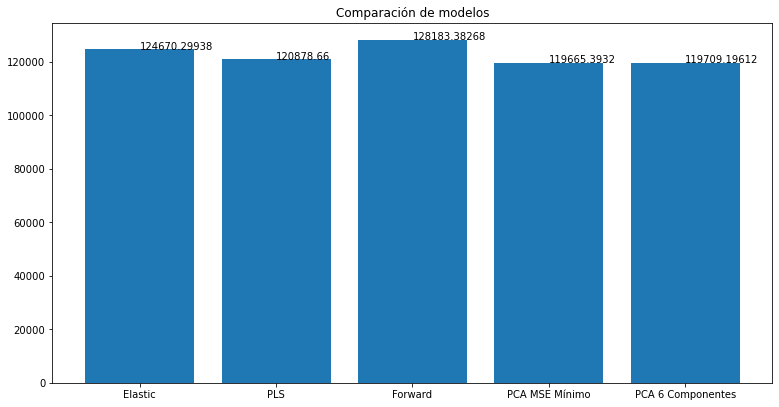

In [54]:
MSE_models = [round(MSEElastic,5),round(MSEPLS,5),round(MSEFwd,5),round(MSEPCAargmin,5),round(MSEPCA6com,5)]


fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['Elastic', 'PLS','Forward', 'PCA MSE Mínimo','PCA 6 Componentes']
ejeY = MSE_models
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()